In [20]:
import os
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
!unzip -o -q "/content/drive/MyDrive/archive (10).zip" -d "/content/dataset"





In [5]:
base_dir = "/content/dataset"
folders = ["train/cats", "train/dogs", "test/cats", "test/dogs"]

for f in folders:
    path = os.path.join(base_dir, f)
    if os.path.exists(path):
        print(f"{f}: {len(os.listdir(path))} file")
    else:
        print(f"{f}: folder tidak ditemukan")

train/cats: 10000 file
train/dogs: 10000 file
test/cats: 2500 file
test/dogs: 2500 file


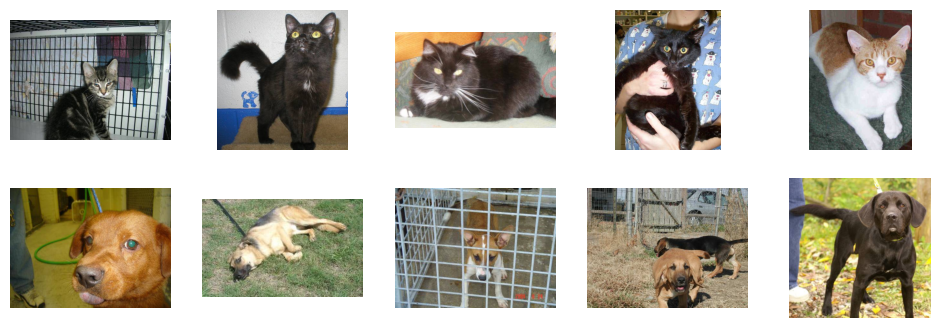

In [6]:
import random
from matplotlib import image

sample_cats = random.sample(os.listdir(base_dir + "/train/cats"), 5)
sample_dogs = random.sample(os.listdir(base_dir + "/train/dogs"), 5)

plt.figure(figsize=(12,4))
for i, fname in enumerate(sample_cats + sample_dogs):
    img = image.imread(os.path.join(base_dir + "/train/cats" if i<5 else base_dir + "/train/dogs", fname))
    plt.subplot(2,5,i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()


In [43]:
train_dir = base_dir + "/train"
test_dir  = base_dir + "/test"

IMG_SIZE = (128,128)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)


Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [44]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,748,225 (10.48 MB)

 Trainable params: 2,748,225 (10.48 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 111s 213ms/step - accuracy: 0.5182 - loss: 0.6919 - val_accuracy: 0.5523 - val_loss: 0.6639
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 104s 208ms/step - accuracy: 0.6302 - loss: 0.6444 - val_accuracy: 0.7080 - val_loss: 0.5672
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 105s 209ms/step - accuracy: 0.7088 - loss: 0.5661 - val_accuracy: 0.7563 - val_loss: 0.5018
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 106s 213ms/step - accuracy: 0.7577 - loss: 0.5026 - val_accuracy: 0.7705 - val_loss: 0.4764
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 103s 206ms/step - accuracy: 0.7865 - loss: 0.4586 - val_accuracy: 0.7765 - val_loss: 0.4707
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 105s 209ms/step - accuracy: 0.7937 - loss: 0.4415 - val_accuracy: 0.8155 - val_loss: 0.4077
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 105s 211ms/step - accuracy: 0.8149 - loss: 0.3997 - val_accuracy: 0.8292 - val_loss: 0.3805
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 103s 207ms/step - accuracy: 0.8295 -

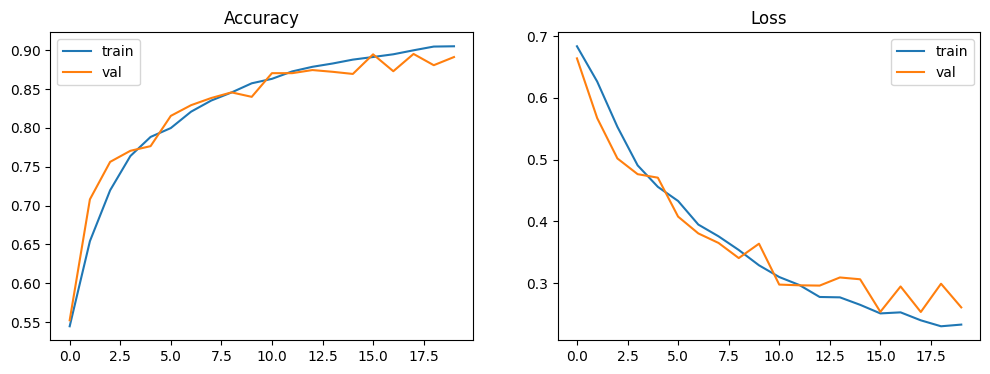

In [46]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Loss")
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


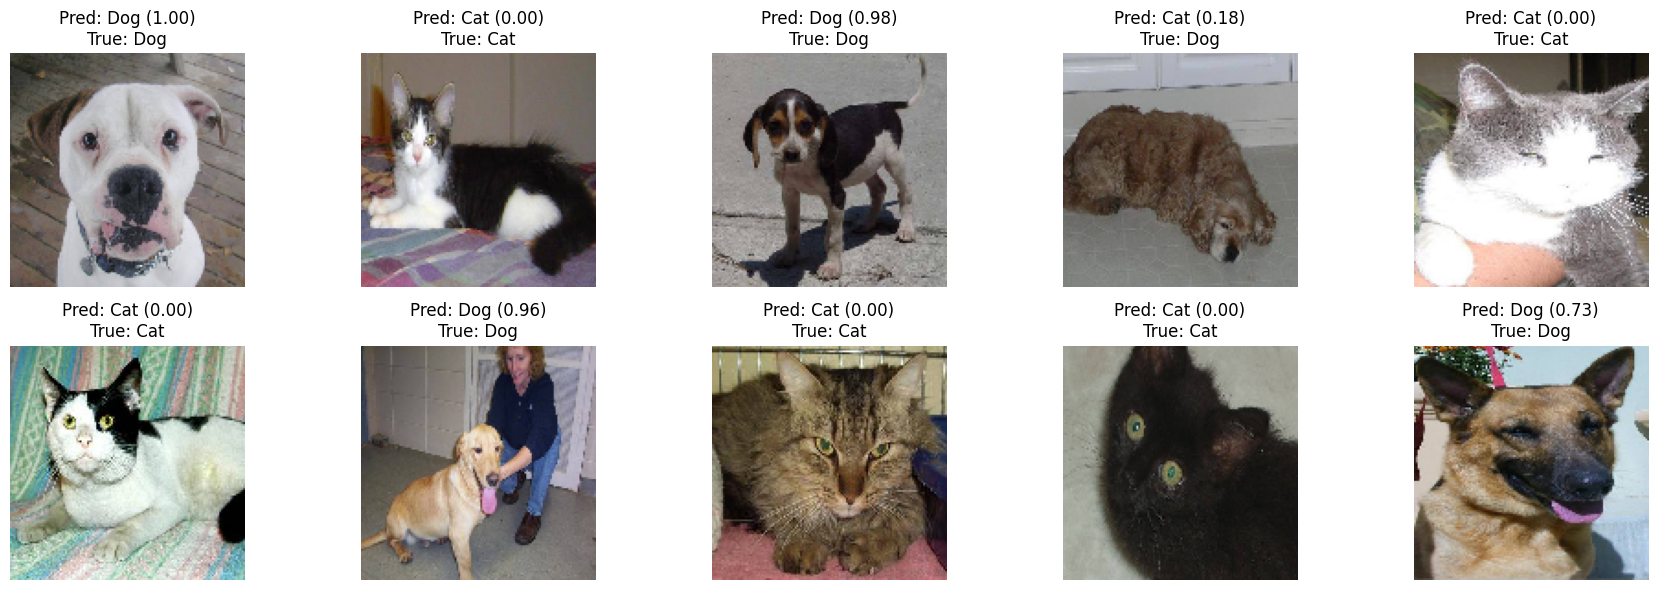

In [52]:
# Ambil seluruh test set
test_imgs, test_labels = [], []
for _ in range(len(test_generator)):
    imgs, labels = next(test_generator)
    test_imgs.append(imgs)
    test_labels.append(labels)

test_imgs = np.concatenate(test_imgs)
test_labels = np.concatenate(test_labels)

# Pisahkan index kucing dan anjing
cat_idx = np.where(test_labels == 0)[0]
dog_idx = np.where(test_labels == 1)[0]

# Ambil 5 random dari masing-masing
rand_cat_idx = np.random.choice(cat_idx, 5, replace=False)
rand_dog_idx = np.random.choice(dog_idx, 5, replace=False)
random_idx = np.concatenate([rand_cat_idx, rand_dog_idx])
np.random.shuffle(random_idx)

# Plot gambar beserta prediksi
plt.figure(figsize=(18, 6))
for i, idx in enumerate(random_idx):
    img = test_imgs[idx]
    label = test_labels[idx]

    pred_prob = model.predict(np.expand_dims(img, axis=0))[0][0]
    pred_class = int(pred_prob > 0.5)

    true_label = "Dog" if label == 1 else "Cat"
    pred_label = f"Dog ({pred_prob:.2f})" if pred_class == 1 else f"Cat ({pred_prob:.2f})"

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [53]:
model.save("dogs_cats_modelv2.h5")


In [54]:
model.save("/content/drive/MyDrive/dogs_cats_model2.h5")


In [55]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("dogs_cats_modelv2.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpb4wknuyw'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor_134')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  136388162063440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136388162066704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136388162067664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136388162066896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136388162068048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136388162067856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136388162068432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136388162068240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136388162068816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136388162068624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1363881620

In [ ]:
!cp dogs_cats_modelv2.tflite /content/drive/MyDrive/
